In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np

In [2]:
IMAGE_SIZE=128
BATCH_SIZE=8
EPOCHS=20

In [3]:
# Use ImageDataGenerator instead of image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling in one generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2  # 20% for validation + test
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    "dataset_tomato",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

Found 12813 images belonging to 10 classes.


In [5]:
train_generator.class_indices


{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [6]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Still split 20% off the total
)

In [7]:
# Test generator (remaining 10% of total)
test_generator = test_datagen.flow_from_directory(
    "dataset_tomato",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',  # Use validation split
    shuffle=False
)

Found 3198 images belonging to 10 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    "dataset_tomato",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)

Found 3198 images belonging to 10 classes.


In [9]:
# Simplified model to reduce memory usage
CHANNELS = 3
n_classes = len(train_generator.class_indices)

model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Calculate steps per epoch
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = validation_generator.samples // BATCH_SIZE

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/20
1601/1601 [==============================] - 588s 362ms/step - loss: 1.1602 - accuracy: 0.5993 - val_loss: 0.6818 - val_accuracy: 0.7625
Epoch 2/20
1601/1601 [==============================] - 237s 148ms/step - loss: 0.6044 - accuracy: 0.7877 - val_loss: 0.5703 - val_accuracy: 0.7914
Epoch 3/20
1601/1601 [==============================] - 369s 231ms/step - loss: 0.4531 - accuracy: 0.8365 - val_loss: 0.3313 - val_accuracy: 0.8797
Epoch 4/20
1601/1601 [==============================] - 240s 150ms/step - loss: 0.3757 - accuracy: 0.8697 - val_loss: 0.3012 - val_accuracy: 0.8872
Epoch 5/20
1601/1601 [==============================] - 236s 147ms/step - loss: 0.3297 - accuracy: 0.8866 - val_loss: 0.2569 - val_accuracy: 0.9098
Epoch 6/20
1601/1601 [==============================] - 241s 151ms/step - loss: 0.3209 - accuracy: 0.8885 - val_loss: 0.2650 - val_accuracy: 0.9095
Epoch 7/20
1601/1601 [==============================] - 326s 203ms/step - loss: 0.2648 - accuracy: 0.9087 - val_

In [25]:
scores = model.evaluate(test_generator)

400/400 [==============================] - 9s 22ms/step - loss: 0.2632 - accuracy: 0.9137


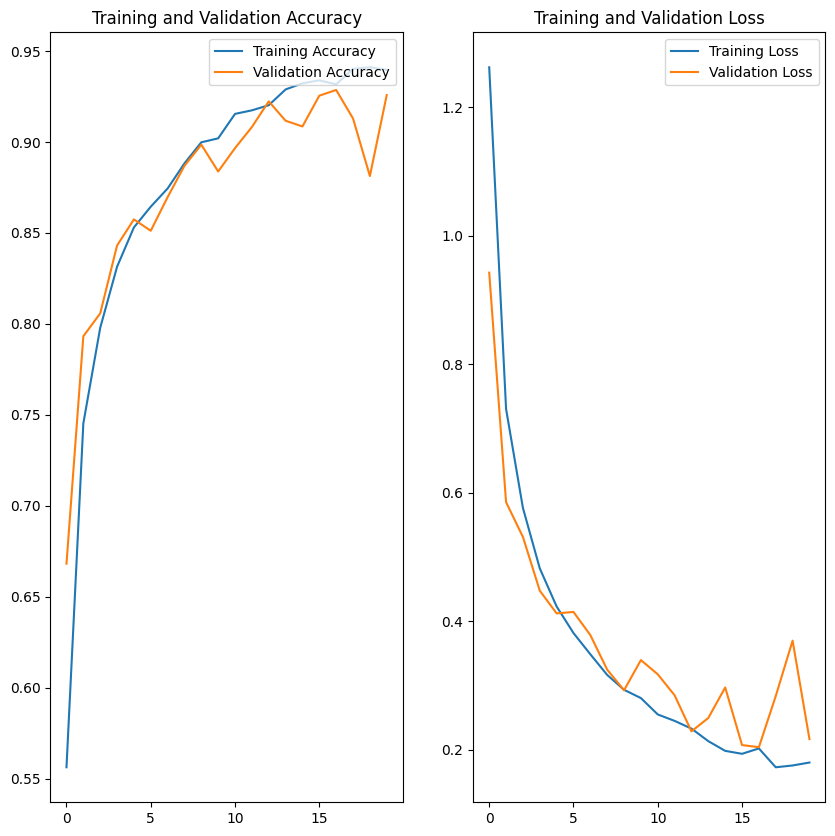

In [27]:

# Extract metrics from history
acc = history.history['accuracy']         # Training accuracy
val_acc = history.history['val_accuracy'] # Validation accuracy
loss = history.history['loss']            # Training loss
val_loss = history.history['val_loss']    # Validation loss

# Plotting
plt.figure(figsize=(10, 10))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Display the plot
plt.show()

First image to predict


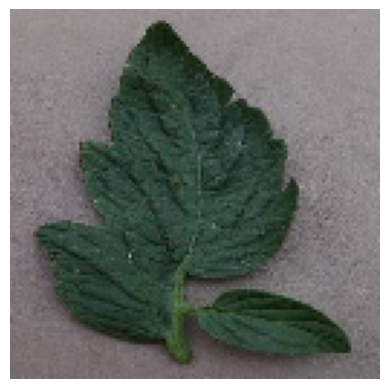

Actual label: Tomato_Bacterial_spot
1/1 [==============================] - 1s 507ms/step
Predicted label: Tomato_Bacterial_spot


In [29]:


# Assuming test_generator is defined (from earlier suggestions)
# If using validation_generator as test set, replace test_generator with validation_generator
test_generator.reset()  # Reset generator to start from the beginning

# Get one batch of images and labels
images_batch, labels_batch = next(test_generator)

# Extract the first image and label
first_image = images_batch[0]  # Already normalized (0-1) by ImageDataGenerator
first_label = int(labels_batch[0])  # Convert to integer (sparse labels)

# Get class names from the generator
class_names = list(test_generator.class_indices.keys())  # List of class names

# Display the first image
print("First image to predict")
plt.imshow(first_image)  # No need for .numpy() or astype('uint8') since it's preprocessed
plt.axis('off')
plt.show()

# Print actual label
print("Actual label:", class_names[first_label])

# Make predictions on the batch
batch_prediction = model.predict(images_batch)
predicted_label = class_names[np.argmax(batch_prediction[0])]
print("Predicted label:", predicted_label)

In [31]:
import os

In [33]:
model_version=3
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets


INFO:tensorflow:Assets written to: ../models/3\assets


In [35]:
model.save("../tomatos.h5")